# Лабораторная работа 3
Классификация в sklearn. Метрики классификации

Выполнил: 6133-010402D, Богданова Юлия Николаевна

0.  Выберите наборы данных, подходящие для многоклассовой и бинарной классификации. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1. Многоклассовая классификация.

1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

1.2. То же самое с использованием кросс-валидации

1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор). ([пример](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)):

## Dataset Description

Source: https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation  

Customer segmentation is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits.  

|#|Attribute name|Attribute Information| Usage in model|
| :-: | :- | -: |:-|
1|ID| Unique id (category)| not used |
2|Gender|Gender (Binary) | used as 0/1|
3|Ever_Married| Marital status of the customer (Binary)| used as 0/1 |
4|Age| Customer Age (numerical)| used as it is |
5|Graduated| Is the customer a graduate (Binary)|used as 0/1|
6|Profession| Profession (Categorical)|used as dummies|
7|Work_Experience| Work Experience in years (Numerical)|used as it is|
8|Spending_Score| Spending score (Category)| used as it is |
9|Family_Size| Amount of members in family (Numerical)|used as it is|  
10|Var_1	| Anonymised Category for the customer (category)|used as dummies|  
11| __Target__: Segmentation| 4 segments (A, B, C, D )|used as it is|

In [23]:
# On kaggle it was already splitted like this
data_df = pd.read_csv("./datasets/customer_multi_train.csv")

In [24]:
data_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [25]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64


[Text(0.5, 1.0, 'Countplot of target')]

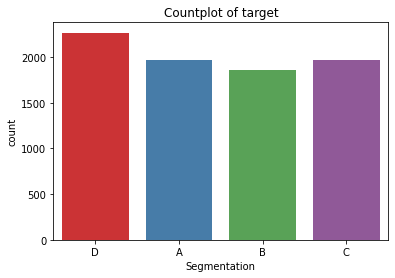

In [26]:
print(data_df['Segmentation'].value_counts())
sns.countplot(x = data_df['Segmentation'], data = data_df, palette='Set1').set(title='Countplot of target')

<AxesSubplot:>

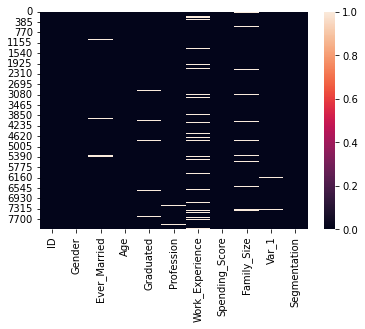

In [27]:
# There are some nullvalues
sns.heatmap(data_df.isnull())

## Data preparation

Do this for train and test dataframes separately.

In [7]:
data_df.keys()

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [28]:
data_df.dropna(axis=0, subset=['Gender','Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'], inplace=True)

Dataset size =  6665


<AxesSubplot:>

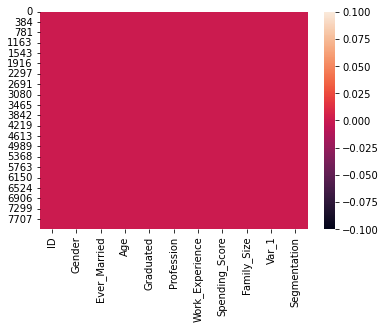

In [29]:
print('Dataset size = ', len(data_df))
sns.heatmap(data_df.isnull())

In [30]:
# Change categorical binary to 0/1
data_df['Ever_Married'] = data_df.apply(lambda x: int(1) if x['Ever_Married'] == 'Yes' else int(0), axis=int(1))
data_df['Graduated'] = data_df.apply(lambda x: int(1) if x['Graduated'] == 'Yes' else int(0), axis=int(1))
data_df['Gender'] = data_df.apply(lambda x: int(1) if x['Ever_Married'] == 'Female' else int(0), axis=int(1))

In [31]:
data_df[:2]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,0,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,0,1,67,1,Engineer,1.0,Low,1.0,Cat_6,B


In [32]:
# Convert categories to dummies
# Profession
profession = pd.get_dummies(data_df['Profession'], drop_first=True)
# Spending_Score
spending_score = pd.get_dummies(data_df['Spending_Score'], drop_first=True)
# Var_1
var_1 = pd.get_dummies(data_df['Var_1'], drop_first=True)

data_df.drop(['Profession', 'Spending_Score', 'Var_1'], axis=1, inplace=True)
data_df = pd.concat([data_df, profession, spending_score, var_1], axis=1)

In [33]:
del data_df['ID']

In [34]:
data_df[:2]

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Doctor,Engineer,Entertainment,...,Lawyer,Marketing,High,Low,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,0,0,22,0,1.0,4.0,D,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,1,67,1,1.0,1.0,B,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()

In [37]:
le.fit(data_df['Segmentation'])

LabelEncoder()

In [38]:
le.classes_

array(['A', 'B', 'C', 'D'], dtype=object)

In [39]:
data_df['Segmentation'] = le.transform(data_df['Segmentation'])

In [40]:
data_df[:2]

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Doctor,Engineer,Entertainment,...,Lawyer,Marketing,High,Low,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,0,0,22,0,1.0,4.0,3,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,1,67,1,1.0,1.0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


## Classification

In [47]:
import sklearn
import sklearn.neighbors
from sklearn.metrics import r2_score, confusion_matrix, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [43]:
# Split Targets and Features
y = data_df['Segmentation']
X = data_df.drop(['Segmentation'], axis=1)

In [44]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.25, random_state=0)

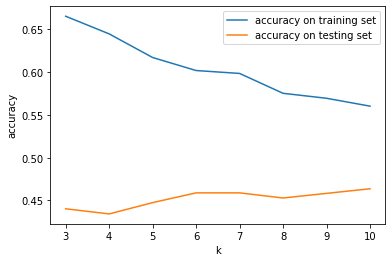

In [50]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(3, 11)
for n_neighbors in neighbors_settings:
    clf = sklearn.neighbors.KNeighborsClassifier( n_neighbors = n_neighbors )
    clf.fit( X_train, y_train )
    training_accuracy.append( clf.score(X_train, y_train) )
    test_accuracy.append( clf.score(X_test, y_test) )

plt.plot( neighbors_settings, training_accuracy, label="accuracy on training set" )
plt.plot( neighbors_settings, test_accuracy, label="accuracy on testing set" )
plt.ylabel("accuracy")
plt.xlabel("k")
g = plt.legend()

## Normalization

In [51]:
scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

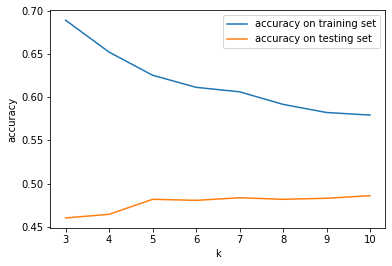

In [52]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(3, 11)
for n_neighbors in neighbors_settings:
    clf = sklearn.neighbors.KNeighborsClassifier( n_neighbors = n_neighbors )
    clf.fit( X_train_n, y_train )
    training_accuracy.append( clf.score(X_train_n, y_train) )
    test_accuracy.append( clf.score(X_test_n, y_test) )

plt.plot( neighbors_settings, training_accuracy, label="accuracy on training set" )
plt.plot( neighbors_settings, test_accuracy, label="accuracy on testing set" )
plt.ylabel("accuracy")
plt.xlabel("k")
g = plt.legend()

Accuracy is __higher__ with normalization, but still poor.  
Let's try to remove some features.

In [54]:
data_df_2 = data_df[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience',
       'Family_Size', 'Segmentation', 'Doctor', 'Engineer', 'Entertainment',
       'Executive', 'Healthcare', 'Homemaker', 'Lawyer', 'Marketing', 'High',
       'Low']]

In [55]:
# Split Targets and Features
y = data_df_2['Segmentation']
X = data_df_2.drop(['Segmentation'], axis=1)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.25, random_state=0)

In [57]:
scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

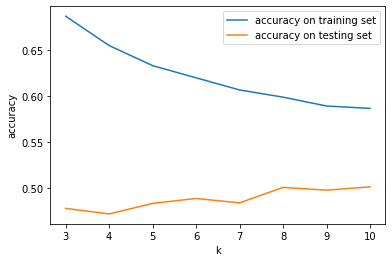

In [58]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(3, 11)
for n_neighbors in neighbors_settings:
    clf = sklearn.neighbors.KNeighborsClassifier( n_neighbors = n_neighbors )
    clf.fit( X_train_n, y_train )
    training_accuracy.append( clf.score(X_train_n, y_train) )
    test_accuracy.append( clf.score(X_test_n, y_test) )

plt.plot( neighbors_settings, training_accuracy, label="accuracy on training set" )
plt.plot( neighbors_settings, test_accuracy, label="accuracy on testing set" )
plt.ylabel("accuracy")
plt.xlabel("k")
g = plt.legend()

In [85]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_n, y_train)
predictions = knn.predict(X_test_n)

In [86]:
print("kNN")
print(classification_report(y_test, predictions))

kNN
              precision    recall  f1-score   support

           0       0.40      0.47      0.43       387
           1       0.37      0.36      0.36       364
           2       0.57      0.52      0.55       477
           3       0.65      0.63      0.64       439

    accuracy                           0.50      1667
   macro avg       0.50      0.49      0.49      1667
weighted avg       0.51      0.50      0.50      1667



<AxesSubplot:>

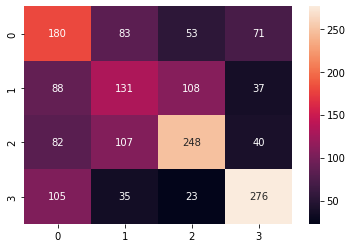

In [87]:
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d")

# 2. Бинарная классификация.

На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить `classification_report`


## Dataset Description

Source: https://www.kaggle.com/hassanamin/customer-churn

Это данные клиентов компании, которая созданет их рекламу для веб-сайтов.  Прогнозируется отток клиентов. Компания хочет спрогнозировать уход клиента и назначить ему менеджера, если возможен его уход. 

|#|Attribute name|Attribute Information| Usage in model|
| :-: | :- | -: |:-|
1|Name| Name of the latest contact at Company (category)| not used |
2|Age|Customer Age (numerical)| used as it is |
3|Total_Purchase| Total Ads Purchased (numerical)| used as it is |
4|Account_Manager| 0=No manager, 1= Account manager assigned (Binary) | used as it is |
5|Years| Totaly Years as a customer (numerical)|used as it is|
6|Num_sites| Number of websites that use the service (numerical)|used as it is|
7|Onboard_date| Date that the name of the latest contact was onboarded (category)|split to year, month, day of week;  time not used as we don't know timezone|
8|Location| Client HQ Address (category)| need to extract state, 63 unique |
9|Company| Name of Client Company (category)|873 unique names, not used|
10| __Target__: Churn| 0=client will stay, 1=will churn (Binary)|used as it is|

Таблица 900 rows × 10 columns.   
Missing Attribute Values: None.  

In [2]:
dataset_df = pd.read_csv("./datasets/customer_churn.csv") 

In [3]:
dataset_df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [4]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


0    750
1    150
Name: Churn, dtype: int64


[Text(0.5, 1.0, 'Countplot of target')]

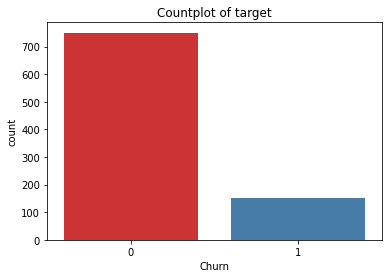

In [5]:
# Dataset is unbalanced
print(dataset_df['Churn'].value_counts())
sns.countplot(x = dataset_df['Churn'], data = dataset_df, palette='Set1').set(title='Countplot of target')

In [6]:
origin = dataset_df.copy()

## Data preparation

In [7]:
# Extracting two–letter state abbreviations
def extract_state(x):
    if x[0].lower() == 'u':
        idx = x.find('DPO')
        return x[idx+2:idx+4]
    else:
        idx = x.find(',')
        return x[idx+2:idx+4]

dataset_df['State'] = dataset_df['Location'].apply(extract_state)

In [8]:
dataset_df[:2]

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn,State
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1,AK
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1,RI


In [9]:
# Extract weekday, month, year
datetime_vals = pd.to_datetime(dataset_df['Onboard_date'], format="%Y/%m/%d")
# The day of the week with Monday=0, Sunday=6.
dataset_df['Weekdays'] = [i.weekday() for i in datetime_vals]
dataset_df['Month'] = [i.month for i in datetime_vals]
dataset_df['Year'] = [i.year for i in datetime_vals]

In [10]:
# Delete columns no longer needed
del dataset_df['Onboard_date']
del dataset_df['Location']
del dataset_df['Names']
del dataset_df['Company']

In [11]:
dataset_df[:4]

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn,State,Weekdays,Month,Year
0,42.0,11066.80,0,7.22,8.0,1,AK,4,8,2013
1,41.0,11916.22,0,6.50,11.0,1,RI,1,8,2013
2,38.0,12884.75,0,6.67,12.0,1,DE,2,6,2016
3,42.0,8010.76,0,6.71,10.0,1,WY,1,4,2014


In [12]:
# Convert categories to dummies
# State
state = pd.get_dummies(dataset_df['State'], drop_first=True)
del dataset_df['State']
dataset_df = pd.concat([dataset_df, state], axis=1)

In [13]:
dataset_df[:4]

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn,Weekdays,Month,Year,AL,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
0,42.0,11066.80,0,7.22,8.0,1,4,8,2013,0,...,0,0,0,0,0,0,0,0,0,0
1,41.0,11916.22,0,6.50,11.0,1,1,8,2013,0,...,0,0,0,0,0,0,0,0,0,0
2,38.0,12884.75,0,6.67,12.0,1,2,6,2016,0,...,0,0,0,0,0,0,0,0,0,0
3,42.0,8010.76,0,6.71,10.0,1,1,4,2014,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
dataset_df.keys()

Index(['Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites',
       'Churn', 'Weekdays', 'Month', 'Year', 'AL', 'AR', 'AS', 'AZ', 'Bo',
       'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'FM', 'GA', 'GU', 'HI', 'IA', 'ID',
       'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MH', 'MI', 'MN', 'MO',
       'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'O ',
       'OH', 'OK', 'OR', 'PA', 'PR', 'PW', 'RI', 'SC', 'SD', 'SN', 'SS', 'TN',
       'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')

## Classification

In [15]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
# Split Targets and Features
y = dataset_df['Churn']
X = dataset_df.drop(['Churn'], axis=1)

In [17]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.25, random_state=0)

In [18]:
# Fix unbalanced data
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = sklearn.utils.shuffle(
    features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

X_upsampled, y_upsampled = upsample(X_train, y_train, 3) 

In [19]:
model = sklearn.svm.LinearSVC(random_state=0, max_iter=10000)
model.fit(X_upsampled, y_upsampled)
prediction = model.predict(X_test)

In [20]:
print("LinearSvC")
print(classification_report(y_test, prediction))

LinearSvC
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       194
           1       0.00      0.00      0.00        31

    accuracy                           0.86       225
   macro avg       0.43      0.50      0.46       225
weighted avg       0.74      0.86      0.80       225



In [21]:
cv_results = cross_validate(model, X_test, y_test, cv=3)
cv_results

{'fit_time': array([0.07199645, 0.06204176, 0.06599641]),
 'score_time': array([0.00200105, 0.00200105, 0.00200105]),
 'test_score': array([0.86666667, 0.86666667, 0.85333333])}

In [22]:
model = LogisticRegression()
model.fit(X_upsampled, y_upsampled)
prediction_lr = model.predict(X_test)

In [23]:
print("LogisticRegression")
print(classification_report(y_test, prediction_lr))

LogisticRegression
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       194
           1       0.62      0.84      0.71        31

    accuracy                           0.91       225
   macro avg       0.80      0.88      0.83       225
weighted avg       0.92      0.91      0.91       225



LogisticRegression showed __better__ results on this dataset.

<AxesSubplot:>

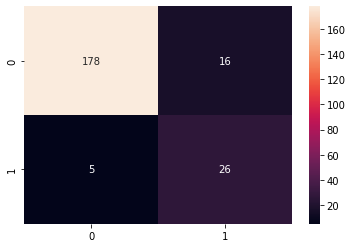

In [24]:
conf_matrix = confusion_matrix(y_test, prediction_lr)
sns.heatmap(conf_matrix, annot=True, fmt="d")

### Normalization

In [25]:
scaler = StandardScaler()
X_upsampled_n = scaler.fit_transform(X_upsampled)
X_test_n = scaler.transform(X_test)

In [28]:
model = sklearn.svm.LinearSVC(random_state=0, max_iter=10000)
model.fit(X_upsampled_n, y_upsampled)
prediction = model.predict(X_test_n)

In [30]:
print("LinearSvC")
print(classification_report(y_test, prediction))

LinearSvC
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       194
           1       0.57      0.74      0.65        31

    accuracy                           0.89       225
   macro avg       0.77      0.83      0.79       225
weighted avg       0.90      0.89      0.89       225



In [31]:
model = LogisticRegression()
model.fit(X_upsampled_n, y_upsampled)
prediction_lr = model.predict(X_test_n)

In [32]:
print("LogisticRegression")
print(classification_report(y_test, prediction_lr))

LogisticRegression
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       194
           1       0.59      0.71      0.65        31

    accuracy                           0.89       225
   macro avg       0.77      0.82      0.79       225
weighted avg       0.90      0.89      0.90       225



__После нормализации__ результат   
LinearSvC улучшился  
LogisticRegression ухудшился

# 3. Использование нормализации признаков.
В обоих задачах (бинарной и многоклассовой классификации) попробовать также вариант с предварительной нормализацией признаков (`StandardScaler`или `MinMaxScaler`). Оценить метрики качества в случае с нормализованными признаками и ненормализованными.

См. внутри заданий 1,2